<a href="https://colab.research.google.com/github/ameyaoka/micrograd-implementation/blob/main/micrograd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Micrograd 

In [2]:
import math
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
def f(x):
  return 3*x**2 -4*x + 5

In [4]:
f(3.0)

20.0

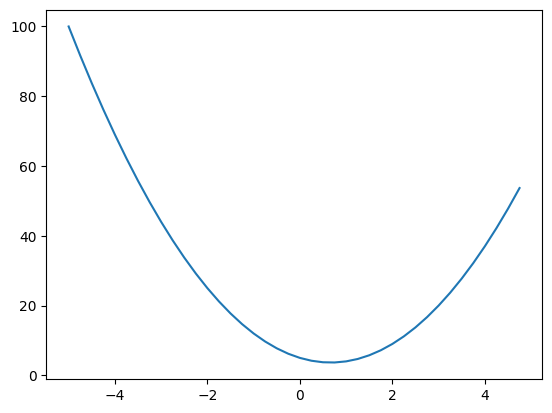

In [5]:
xs = np.arange(-5,5,0.25)
ys=  f(xs)
plt.plot(xs,ys)

- **Slope**

In [6]:
h = 0.00001
x= 3.0 
(f(x+h) - f(x))/h

14.00003000000538

In [7]:

h = 0.00001
x= -3.0 
(f(x+h) - f(x))/h

-21.999970000052823

In [8]:
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)



4.0


 - **derivative with respect to a**

In [9]:
h = 0.0001


a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
a += h         # a = a+h 
d2 = a*b + c

print('d1',d1)
print('d2',d2)
print('slope',(d2-d1)/h)



d1 4.0
d2 3.999699999999999
slope -3.000000000010772


- **Derivative with repect to b**

In [10]:
h = 0.0001


a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
b += h         # a = a+h 
d2 = a*b + c

print('d1',d1)
print('d2',d2)
print('slope',(d2-d1)/h)



d1 4.0
d2 4.0002
slope 2.0000000000042206


In [11]:
h = 0.0001


a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
c += h         # a = a+h 
d2 = a*b + c

print('d1',d1)
print('d2',d2)
print('slope',(d2-d1)/h)



d1 4.0
d2 4.0001
slope 0.9999999999976694


In [12]:
class Value:
  
  def __init__(self, data):
    self.data = data
  
  def __repr__(self):
    return f"Value(data = {self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data)
    return out
    
  def __mul__(self, other):
    out = Value(self.data * other.data)
    return out


a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
d= a*b +c
d

Value(data = 4.0)


1. The __init__ method initializes a Value object with the provided data value and an optional _children and _op argument 
  - _children is a set of previous Value objects that contributed to the current value
  - l _op parameter, which represents the operation performed to obtain the current value. The _op attribute is then set accordingly.
2. The __add__ method overloads the + operator.

  - defines the addition operation between two Value objects.
  -

3. The __mul__ method overloads the * operator 
  - defines the  multiplication operation between two Value objects.

 - class : In oops a class is a blueprint for creating objects (instances) that sare common properties(attributes) and behavior (method).

- __init__ is a special method known as constructor.

- constructor used to initialize objects attributes.


- __init__ is dunder method .

- dunder method is a method that allows instances of a class to interact with builtin function and operators of language.
- dunder comes from double underscore.


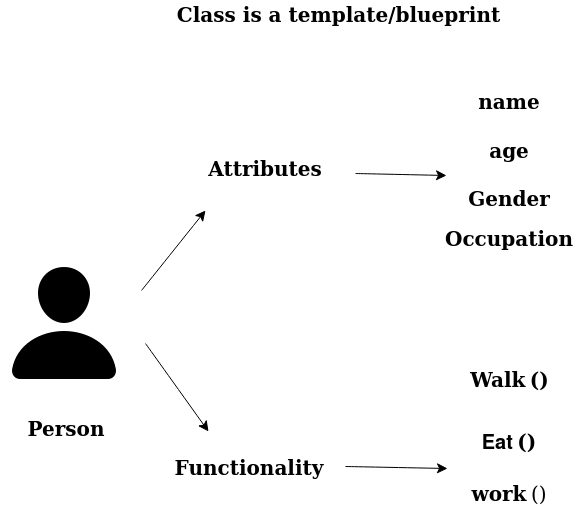





In [42]:
class Value:
  
  def __init__(self, data,_children=(),_op='',label=''):
    self.data = data
    self.grad = 0.0             # initially we assume gradient is 0 ie changing the var will not effect output.
    self._prev = set(_children)
    self._op = _op 
    self.label = label 
  def __repr__(self):
    return f"Value(data = {self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data ,(self,other),'+')
    return out
    
  def __mul__(self, other):
    out = Value(self.data * other.data ,(self,other),'*')
    return out


a = Value(2.0 , label='a')
b = Value(-3.0, label='b')
c = Value(10.0 , label = 'c')
e = a*b ; e.label = 'e'
d= e +c ; d.label = 'd'
f = Value(-2.0, label = 'f')
L = d * f; L.label = 'L'
L

Value(data = -8.0)

In [14]:
L._op

'*'

In [15]:
! pip install graphviz
from graphviz import Digraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
def trace(root):
  nodes, edges = set(), set()
  def build(v):
      if v not in nodes:
          nodes.add(v)
          for child in v._prev:
              edges.add((child, v))
              build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr = {'rankdir': 'LR'})

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name=uid , label = "{ %s | data %.4f | grad %.4f }" % (n.label,n.data,n.grad), shape='record')
        if n._op:
              dot.node(name = uid + n._op ,label=n._op)
              dot.edge(uid + n._op, uid)

  
    for n1, n2 in edges:
            dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

-  rectangle shape is for value objects.

- oval shape is for operations.which were applied on val .



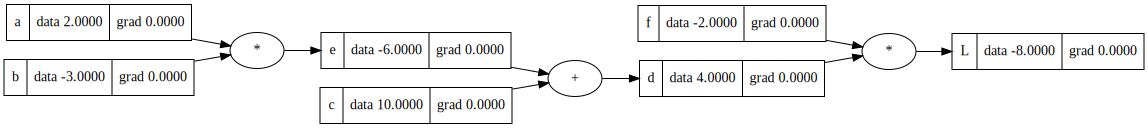

In [17]:
draw_dot(L)

- We build a mathematical expression .
- now we will calculate gradient using backward propogation.
 

In [18]:

def back_prop():

  h = 0.0001

  a = Value(2.0 , label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0 , label = 'c')
  e = a*b ; e.label = 'e'
  d= e +c ; d.label = 'd'
  f = Value(-2.0, label = 'f')
  L = d * f; L.label = 'L'
  L1 = L.data

  a = Value(2.0 , label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0 , label = 'c')
  e = a*b ; e.label = 'e'
  d= e +c ; d.label = 'd'
  f = Value(-2.0, label = 'f')
  L = d * f; L.label = 'L'
  L2 = L.data

  
  print (((L2 +h ) - L1)/h)
  
back_prop()
  

0.9999999999976694


In [19]:
L.grad= 1.0

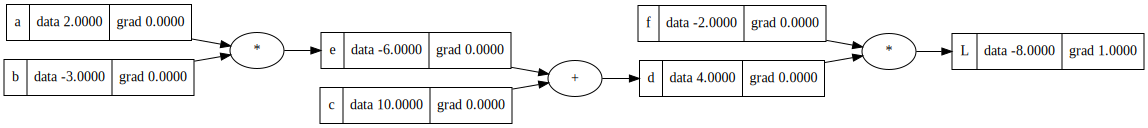

In [20]:
draw_dot(L)

- we will use def of derivative to verify gradient .
- derivative of l wrt d is calculated below .


In [21]:
def back_prop():

  h = 0.0001

  a = Value(2.0 , label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0 , label = 'c')
  e = a*b ; e.label = 'e'
  d= e +c ; d.label = 'd'
  f = Value(-2.0, label = 'f')
  L = d * f; L.label = 'L'
  L1 = L.data

  a = Value(2.0 , label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0 , label = 'c')
  e = a*b ; e.label = 'e'
  d= e +c ; d.label = 'd'
  d.data += h
  f = Value(-2.0, label = 'f')
  L = d * f; L.label = 'L'
  L2 = L.data

  
  print (((L2 ) - L1)/h)
  
back_prop()
  

-1.9999999999953388


- Now we will calulate  derivative of L wrt f.

In [22]:
def back_prop():

  h = 0.0001

  a = Value(2.0 , label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0 , label = 'c')
  e = a*b ; e.label = 'e'
  d= e +c ; d.label = 'd'
  f = Value(-2.0, label = 'f')
  L = d * f; L.label = 'L'
  L1 = L.data

  a = Value(2.0 , label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0 , label = 'c')
  e = a*b ; e.label = 'e'
  d= e +c ; d.label = 'd'
  f = Value(-2.0, label = 'f')
  f.data += h
  L = d * f; L.label = 'L'
  L2 = L.data

  
  print (((L2 ) - L1)/h)
  
back_prop()
  

3.9999999999995595


In [23]:
# derivative calculated above .
d.grad = -2.0
f.grad =  4.0

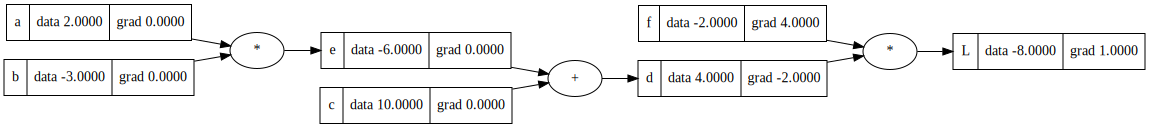

In [24]:
draw_dot(L)

### IMPORTANT  
- chain rule 
- https://en.wikipedia.org/wiki/Chain_rule

In [25]:
def back_prop():

  h = 0.0001

  a = Value(2.0 , label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0 , label = 'c')
  e = a*b ; e.label = 'e'
  d= e +c ; d.label = 'd'
  f = Value(-2.0, label = 'f')
  L = d * f; L.label = 'L'
  L1 = L.data

  a = Value(2.0 , label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0 , label = 'c')
  c.data += h
  e = a*b ; e.label = 'e'
  d= e +c ; d.label = 'd'
  f = Value(-2.0, label = 'f')
  L = d * f; L.label = 'L'
  L2 = L.data

  
  print (((L2 ) - L1)/h)
  
back_prop()



-1.9999999999953388


In [26]:
def back_prop():

  h = 0.0001

  a = Value(2.0 , label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0 , label = 'c')
  e = a*b ; e.label = 'e'
  d= e +c ; d.label = 'd'
  f = Value(-2.0, label = 'f')
  L = d * f; L.label = 'L'
  L1 = L.data

  a = Value(2.0 , label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0 , label = 'c')
  e = a*b ; e.label = 'e'
  e.data += h 
  d= e +c ; d.label = 'd'
  f = Value(-2.0, label = 'f')
  L = d * f; L.label = 'L'
  L2 = L.data

  
  print (((L2 ) - L1)/h)
  
back_prop()

-1.9999999999953388


In [27]:
e.grad = -2.0
c.grad = -2.0

In [28]:
def back_prop():

  h = 0.0001

  a = Value(2.0 , label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0 , label = 'c')
  e = a*b ; e.label = 'e'
  d= e +c ; d.label = 'd'
  f = Value(-2.0, label = 'f')
  L = d * f; L.label = 'L'
  L1 = L.data

  a = Value(2.0 , label='a')
  a.data += h
  b = Value(-3.0, label='b')
  c = Value(10.0 , label = 'c')
  e = a*b ; e.label = 'e'
  d= e +c ; d.label = 'd'
  f = Value(-2.0, label = 'f')
  L = d * f; L.label = 'L'
  L2 = L.data

  
  print (((L2 ) - L1)/h)
  
back_prop()

6.000000000021544


In [29]:
def back_prop():

  h = 0.0001

  a = Value(2.0 , label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0 , label = 'c')
  e = a*b ; e.label = 'e'
  d= e +c ; d.label = 'd'
  f = Value(-2.0, label = 'f')
  L = d * f; L.label = 'L'
  L1 = L.data

  a = Value(2.0 , label='a')
  b = Value(-3.0, label='b')
  b.data += h 
  c = Value(10.0 , label = 'c')
  e = a*b ; e.label = 'e'
  d= e +c ; d.label = 'd'
  f = Value(-2.0, label = 'f')
  L = d * f; L.label = 'L'
  L2 = L.data

  
  print (((L2 ) - L1)/h)
  
back_prop()

-4.000000000008441


In [30]:
a.grad = 6
b.grad = -4

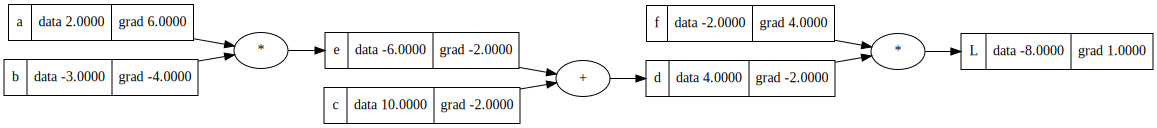

In [31]:
draw_dot(L)

### Backward propogation through neuron 
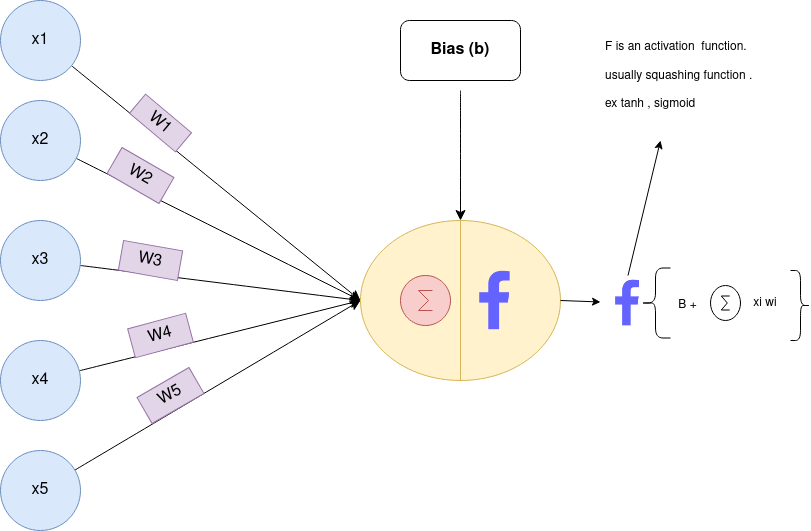


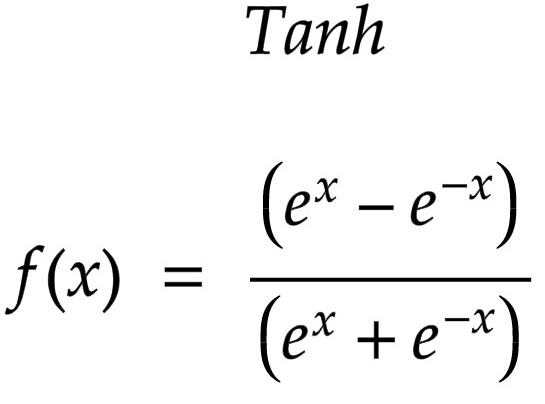


### tanh graph below

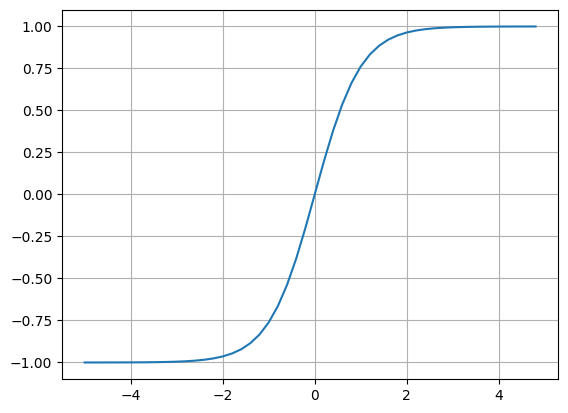

In [32]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();

In [51]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'


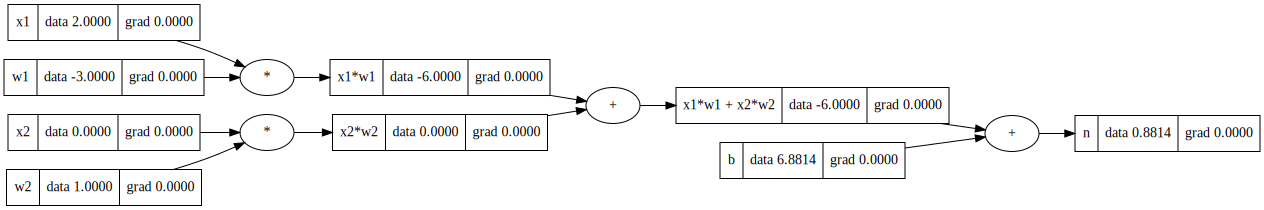

In [52]:
draw_dot(n)

In [55]:
class Value:
  
  def __init__(self, data,_children=(),_op='',label=''):
    self.data = data
    self.grad = 0.0             # initially we assume gradient is 0 ie changing the var will not effect output.
    self._prev = set(_children)
    self._op = _op 
    self.label = label 
  def __repr__(self):
    return f"Value(data = {self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data ,(self,other),'+')
    return out
    
  def __mul__(self, other):
    out = Value(self.data * other.data ,(self,other),'*')
    return out

  
  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')
    return out

In [56]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh()

 - Now we have a tanh (activation / squashing function)

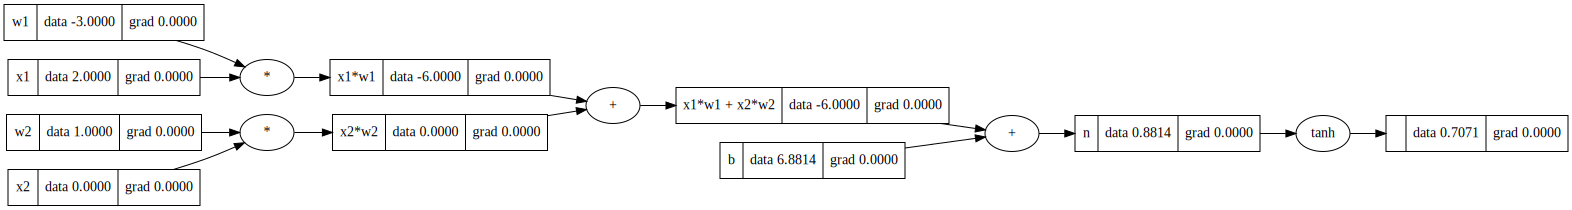

In [57]:
draw_dot(o)